# Artificial Intelligence UE
## Exercises 1 - Uninformed Search

In this series of exercises you can implement a few different **uninformed** search algorithms: 
- Breadth First Search
- Uniform Cost Search
- Depth First Search
- Depth Limited Depth First Search
- Iterative Deepening Search

The algorithms have been explained in the lecture (VO) and we gave you some additional information in the exercise (UE). Please refer to the lecture slides (VO) for the pseudo algorithms and the exercise slides (UE) for additional hints. 
Before implementing the algorithms make sure to check out the introductory notebook "introducing_pig.ipynb" and read the following instructions carefully.

<div class="alert alert-warning">

<p><strong>Practical hints:</strong></p>
<ul>
<li>Replace the placeholders <code># YOUR CODE HERE</code>, <code>raise NotImplementedError()</code> with your code.</li>
<li>Do not rename any of the already existing variables (this might lead to some tests failing / not working).</li>
<li><code>solve()</code> should return the found solution node or <code>None</code> if no solution is found. You do not need to store the path, the function <code>node.get_action_sequence()</code> can be used to retrieve it later via backtracking.</li>
<li>Use a <code>set()</code> to store already visited nodes (when needed).</li>
<li>Use the imported data structures <code>Queue</code>, <code>Stack</code>, and <code>PriorityQueue</code> as the fringe / frontier (choose the right datatype depending on the algorithm)</li>
</ul>
</div>



In [1]:
from pig_lite.problem.base import Problem
from pig_lite.datastructures.queue import Queue
from pig_lite.datastructures.stack import Stack
from pig_lite.datastructures.priority_queue import PriorityQueue
from pig_lite.instance_generation.problem_factory import ProblemFactory

<div class="alert alert-warning">
<strong>Hint:</strong> Here we load and visualize a problem instance that is used for some basic tests, please do not change it. You can use the printed output after each algorithm (i.e., position of the end node, action sequence) to compare whether your algorithm behaves as expected).
</div>

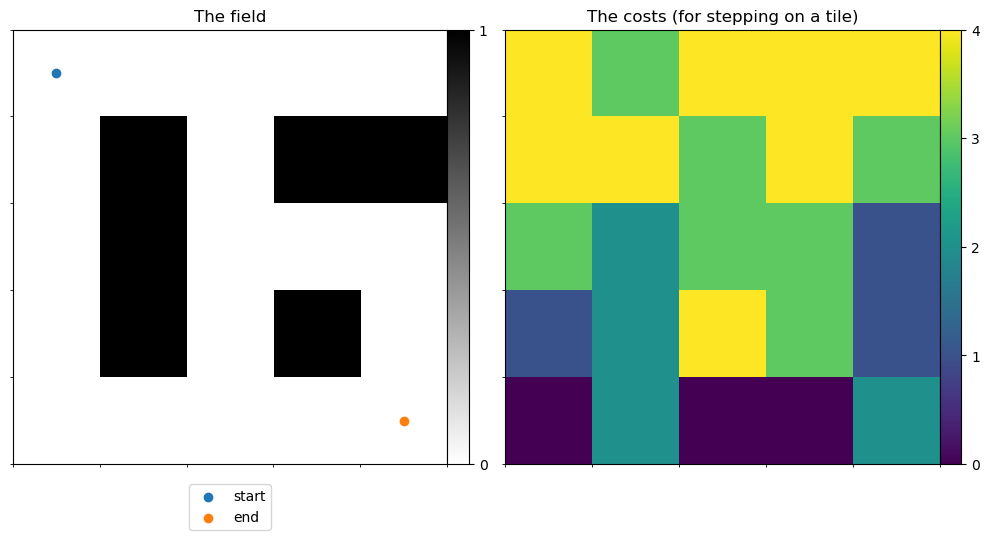

In [2]:
factory = ProblemFactory()
maze = factory.create_problem_from_json(json_path='boards/tiny0.json')
maze.visualize()

<div class="alert alert-warning">
Now it's your turn to implement 5 different uninformed search algorithms - all spots that need your attention are marked with <code># YOUR CODE HERE</code>!
</div>

## Implementing BFS

Queue [Node(id:139993320429904, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]
state (4, 4) was reached following the sequence ['R', 'R', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 20, depth: 8)


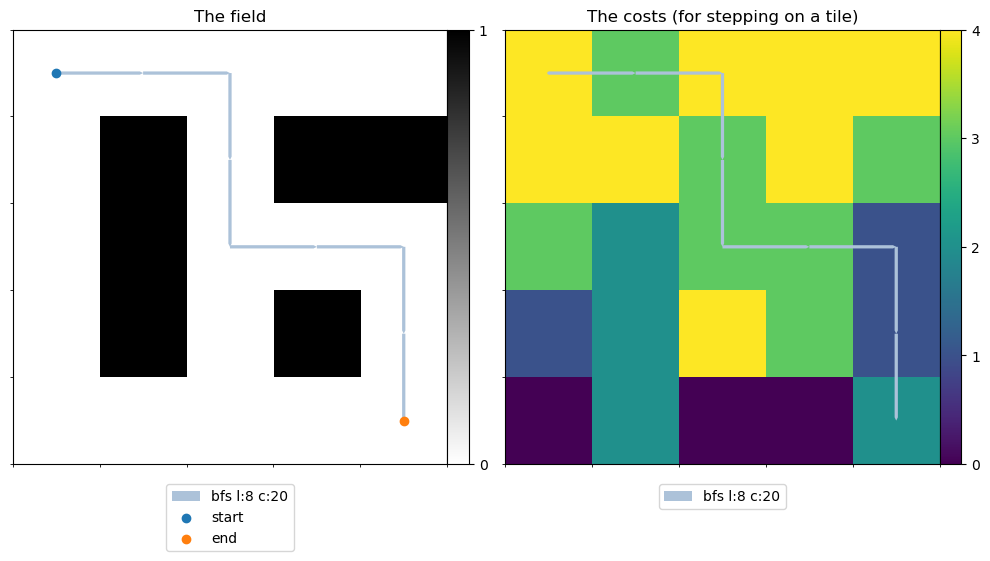

In [3]:
class BFS(object):

    def __init__(self) -> None:
        # YOUR CODE HERE: initialize self.visited and self.fringe here or in the solve function with the correct datatypes
        self.visited = set()
        self.fringe = Queue()

    def solve(self, problem: Problem):
        self.fringe.put(problem.get_start_node())
        print(self.fringe)

        while self.fringe.has_elements():
            current = self.fringe.get()

            if problem.is_end(current):
                return current
            if current in self.visited:
                continue
            else:
                self.visited.add(current)

                for successor in problem.successors(current):
                    self.fringe.put(successor)
    
bfs_search = BFS()
maze.reset() # resets maze for hidden tests
bfs_solution = bfs_search.solve(maze)

if bfs_solution is not None:
    bfs_solution.pretty_print()
    maze.visualize(sequences=[('bfs', bfs_solution.get_action_sequence())])

### Basic Checks

In [4]:
# this is a testing cell, do not edit or delete

assert(bfs_solution is not None), "your algorithm did not return a solution"
assert(bfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"

assert(bfs_solution.cost == 20), "the solution found by your algorithm did not return the expected cost"
assert(bfs_solution.depth == 8), "the solution found by your algorithm does not have the expected length"

### Check visited set

In [5]:
# this is a testing cell, do not edit or delete

assert(bfs_search.visited is not None), "it seems you did not correctly initialize the visited set"

### Check fringe

In [6]:
# this is a testing cell, do not edit or delete

assert(bfs_search.fringe is not None), "it seems you did not correctly initialize the fringe"

### Check expaned nodes

In [7]:
# this is a testing cell, do not edit or delete

bfs_expanded_nodes = maze.get_number_of_expanded_nodes()
assert(bfs_expanded_nodes > 0), "it seems your algorithm did not expand any nodes"
assert(bfs_expanded_nodes == 18), "it seems your algorithm did not expand the correct number of nodes"

### Check different mazes

In [8]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
tiny0 = factory.create_problem_from_json(json_path='boards/tiny0.json')
bfs_solution = bfs_search.solve(tiny0)
assert(bfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == 'c283a9803562a0053fc1ea0c30d421e0b4a7a9f599c699d74477cbeeffec23bc'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993320819296, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [9]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
bfs_solution = bfs_search.solve(tiny1)
assert(bfs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == '66ec8af4739b256cec553c3d2c2cbacbc1fd4c853859c633e44996eed1f6021c'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993320819744, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [10]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
bfs_solution = bfs_search.solve(tiny2)
assert(bfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == '5bda40f5b72290920507aa1d23329fb5a3445346372a30bd35cc85f743c439ac'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993250214784, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [11]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
bfs_solution = bfs_search.solve(tiny3)
assert(bfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == 'e1c95ac72da74163d0c237b69f99dc766c1bbe5e4270fd2934b721d5eab9de31'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993250213328, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [12]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
tiny4 = factory.create_problem_from_json(json_path='boards/tiny4.json')
bfs_solution = bfs_search.solve(tiny4)
assert(bfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993250216016, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [13]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
cyclic_map = factory.create_problem_from_json(json_path='boards/cyclic_map.json')
bfs_solution = bfs_search.solve(cyclic_map)
assert(bfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == 'e1c95ac72da74163d0c237b69f99dc766c1bbe5e4270fd2934b721d5eab9de31'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993250212880, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [14]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
narrow_path = factory.create_problem_from_json(json_path='boards/narrow_path.json')
bfs_solution = bfs_search.solve(narrow_path)
assert(bfs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == '2ee4599132a71cf20e4feae6aff58b9ff77ea9486fb0e12225ddd8896ccb9843'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993250217808, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [15]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
no_possible_path = factory.create_problem_from_json(json_path='boards/no_possible_path.json')
bfs_solution = bfs_search.solve(no_possible_path)
assert(bfs_solution is None), "your algorithm magically found a solution in an impossible maze"

Queue [Node(id:139993250215792, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [16]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
start_is_goal = factory.create_problem_from_json(json_path='boards/start_is_goal.json')
bfs_solution = bfs_search.solve(start_is_goal)
assert(bfs_solution.state == (0, 0)), "your algorithm did not return the expected solution"
assert(bfs_solution.get_action_sequence_hash() == 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'), "your algorithm did not return the expected solution path"

Queue [Node(id:139993250215792, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


In [17]:
# this test is supposed to test whether the visited set is used somewhat correctly (otherwise it will timeout)

bfs_search = BFS()
large = factory.create_problem_from_json(json_path='boards/large.json')
bfs_solution = bfs_search.solve(large)
assert(bfs_solution)
assert(bfs_solution.state == (48, 48)), "your algorithm did not return the expected solution"

Queue [Node(id:139993250214336, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


## Implementing UCS

- implement Uniform Cost Search (UCS), a variant of Dijkstra's Graph Search

state (4, 4) was reached following the sequence ['D', 'D', 'D', 'D', 'R', 'R', 'R', 'R'] (cost: 12, depth: 8)


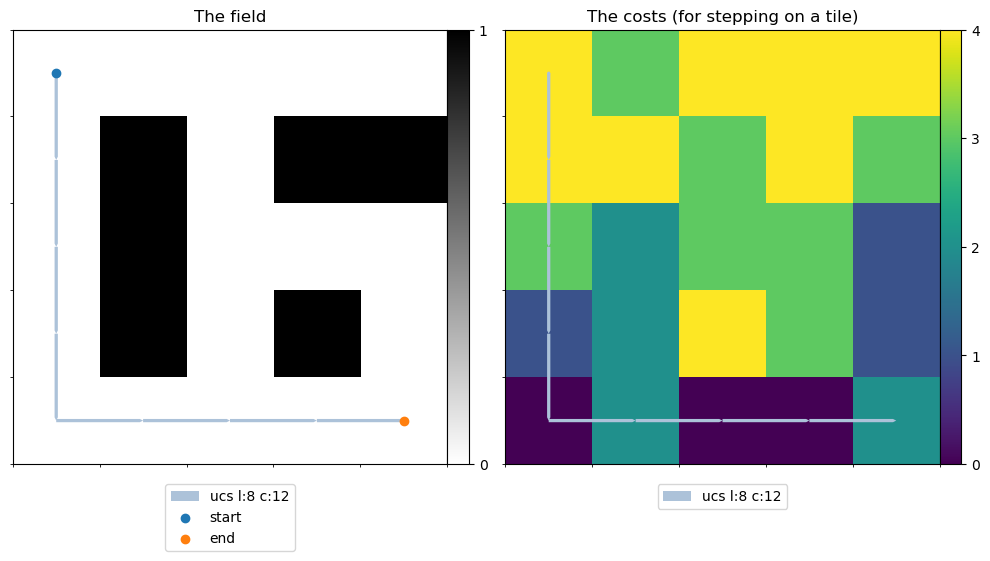

In [35]:
class UCS(object):

    def __init__(self) -> None:
        # YOUR CODE HERE: initialize self.visited and self.fringe here or in the solve function with the correct datatypes
        self.visited = set()
        self.fringe = PriorityQueue()

    def solve(self, problem: Problem):
        # YOUR CODE HERE

        root = problem.get_start_node()
        self.fringe.put(root.cost, root)
        while self.fringe.has_elements():
            current = self.fringe.get()

            if problem.is_end(current):
                return current

            if current in self.visited:
                continue

            self.visited.add(current)
            for successor in problem.successors(current):
                self.fringe.put(successor.cost, successor)
            
        
        return None

ucs_search = UCS()
maze.reset() # resets maze for hidden tests
ucs_solution = ucs_search.solve(maze)

if ucs_solution is not None:
    ucs_solution.pretty_print()
    maze.visualize(sequences=[('ucs', ucs_solution.get_action_sequence())])

### Basic checks

In [36]:
# this is a testing cell, do not edit or delete

assert(ucs_solution is not None), "your algorithm did not return a solution"
assert(ucs_solution.state == (4, 4)), "your algorithm did not return the expected solution"

assert(ucs_solution.depth == 8), "the solution found by your algorithm does not have the expected length"

ucs_expanded_nodes = maze.get_number_of_expanded_nodes()
assert(ucs_expanded_nodes == 12), "it seems your algorithm did not expand the correct number of nodes"

### Check visited set

In [37]:
# this is a testing cell, do not edit or delete

assert(ucs_search.visited is not None), "it seems you did not correctly initialize the visited set"

### Check fringe

In [38]:
# this is a testing cell, do not edit or delete

assert(ucs_search.fringe is not None), "it seems you did not correctly initialize the fringe"

### Checking cost

In [39]:
# this is a testing cell, do not edit or delete

bfs_search = BFS()
maze.reset()
bfs_solution = bfs_search.solve(maze)

assert(ucs_solution.cost < bfs_solution.cost), "the solution cost for UCS should be lower than the one for BFS"
assert(ucs_solution.cost == 12), "the solution found by your algorithm did not return the expected cost"

Queue [Node(id:139993250837376, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


### Check different mazes

In [40]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
tiny0 = factory.create_problem_from_json(json_path='boards/tiny0.json')
ucs_solution = ucs_search.solve(tiny0)
assert(ucs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == '6bdb8d2c34f7d512c6c555c27ec66385b0fd13c5401db6a83cdc68000541dbb5'), "your algorithm did not return the expected solution path"

In [41]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
ucs_solution = ucs_search.solve(tiny1)
assert(ucs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == '473818e05eb92df10661a91a41e2fefd9d3d0b49466df773091a94791b0ac2a5'), "your algorithm did not return the expected solution path"

In [42]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
ucs_solution = ucs_search.solve(tiny2)
assert(ucs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == '5bda40f5b72290920507aa1d23329fb5a3445346372a30bd35cc85f743c439ac'), "your algorithm did not return the expected solution path"

In [43]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
ucs_solution = ucs_search.solve(tiny3)
assert(ucs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == 'e1c95ac72da74163d0c237b69f99dc766c1bbe5e4270fd2934b721d5eab9de31'), "your algorithm did not return the expected solution path"

In [44]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
tiny4 = factory.create_problem_from_json(json_path='boards/tiny4.json')
ucs_solution = ucs_search.solve(tiny4)
assert(ucs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "your algorithm did not return the expected solution path"

In [45]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
cyclic_map = factory.create_problem_from_json(json_path='boards/cyclic_map.json')
ucs_solution = ucs_search.solve(cyclic_map)
assert(ucs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == 'e1c95ac72da74163d0c237b69f99dc766c1bbe5e4270fd2934b721d5eab9de31'), "your algorithm did not return the expected solution path"

In [46]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
narrow_path = factory.create_problem_from_json(json_path='boards/narrow_path.json')
ucs_solution = ucs_search.solve(narrow_path)
assert(ucs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(ucs_solution.get_action_sequence_hash() == '2ee4599132a71cf20e4feae6aff58b9ff77ea9486fb0e12225ddd8896ccb9843'), "your algorithm did not return the expected solution path"

In [47]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
no_possible_path = factory.create_problem_from_json(json_path='boards/no_possible_path.json')
ucs_solution = ucs_search.solve(no_possible_path)
assert(ucs_solution is None), "your algorithm did not handle unreachable goal state correctly"

In [48]:
# this is a testing cell, do not edit or delete

ucs_search = UCS()
start_is_goal = factory.create_problem_from_json(json_path='boards/start_is_goal.json')
ucs_solution = ucs_search.solve(start_is_goal)
assert(ucs_solution.state == (0, 0)), "your algorithm did not return the expected solution when starting from the goal state"
assert(ucs_solution.get_action_sequence_hash() == 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'), "your algorithm did not return the expected solution path"

In [49]:
# this test is supposed to test whether the visited set is used somewhat correctly (otherwise it will timeout)

ucs_search = UCS()
large = factory.create_problem_from_json(json_path='boards/large.json')
ucs_solution = ucs_search.solve(large)
assert(ucs_solution)
assert(ucs_solution.state == (48, 48)), "your algorithm did not return the expected solution"

## Implementing DFS

state (4, 4) was reached following the sequence ['D', 'D', 'D', 'D', 'R', 'R', 'U', 'U', 'R', 'R', 'D', 'D'] (cost: 24, depth: 12)


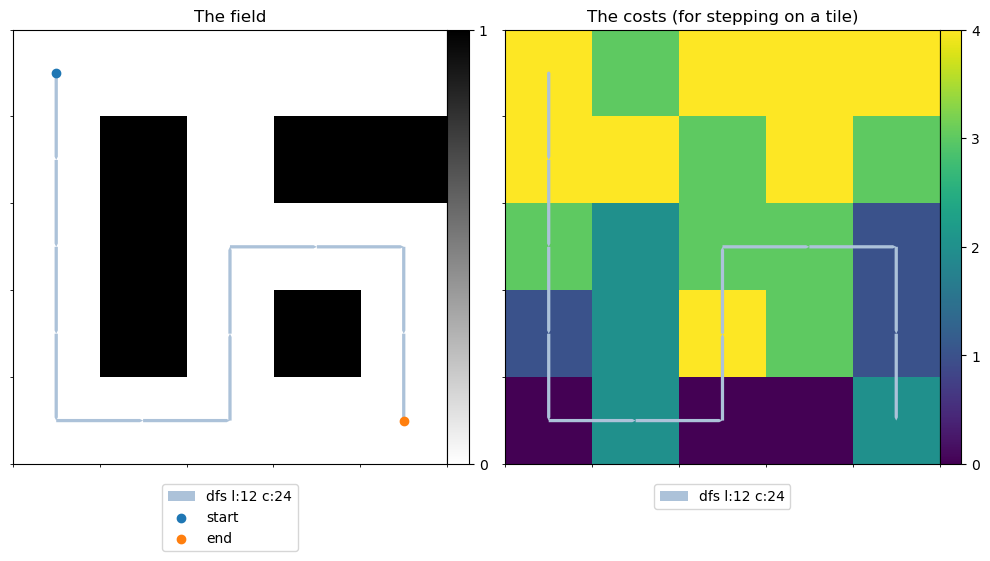

In [50]:
class DFS(object):

    def __init__(self) -> None:
        # YOUR CODE HERE: initialize self.visited and self.fringe here or in the solve function with the correct datatypes
        self.visited = set()
        self.fringe = Stack()

    def solve(self, problem: Problem):
        # YOUR CODE HERE

        root = problem.get_start_node()
        self.fringe.put(root)
        while self.fringe.has_elements():
            current = self.fringe.get()

            if problem.is_end(current):
                return current

            if current in self.visited:
                continue

            self.visited.add(current)
            for successor in problem.successors(current):
                self.fringe.put(successor)
            
        
        return None

        
dfs_search = DFS()
maze.reset() # resets maze for hidden tests
dfs_solution = dfs_search.solve(maze)

if dfs_solution is not None:
    dfs_solution.pretty_print()
    maze.visualize(sequences=[('dfs', dfs_solution.get_action_sequence())])

### Basic checks

In [51]:
# this is a testing cell, do not edit or delete

assert(dfs_solution is not None), "your algorithm did not return a solution"
assert(dfs_solution is not None or isinstance(dfs_solution, type(maze.get_start_node()))), "your solution is not of the right type"
assert(dfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"

assert(dfs_solution.cost == 24), "the solution found by your algorithm did not return the expected cost"
assert(dfs_solution.depth == 12), "the solution found by your algorithm does not have the expected length"

### Check visited set

In [52]:
# this is a testing cell, do not edit or delete

assert(dfs_search.visited is not None), "it seems you did not correctly initialize the visited set"

### Check fringe

In [53]:
# this is a testing cell, do not edit or delete

assert(dfs_search.fringe is not None), "it seems you did not correctly initialize the fringe"

### Check different mazes

In [54]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
tiny0 = factory.create_problem_from_json(json_path='boards/tiny0.json')
dfs_solution = dfs_search.solve(tiny0)
assert(dfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == 'e1fa32922bd28adb1dbb8a08b56547137b98d1105229a033162ae0edb274f418'), "your algorithm did not return the expected solution path"

In [55]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
dfs_solution = dfs_search.solve(tiny1)
assert(dfs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == '50ad40a2921e4009cab8f9bdb1c7a00bf36f69fbe7a20b83aeb93227334ee601'), "your algorithm did not return the expected solution path"

In [56]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
dfs_solution = dfs_search.solve(tiny2)
assert(dfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == '5bda40f5b72290920507aa1d23329fb5a3445346372a30bd35cc85f743c439ac'), "your algorithm did not return the expected solution path"

In [57]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
dfs_solution = dfs_search.solve(tiny3)
assert(dfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == '5bda40f5b72290920507aa1d23329fb5a3445346372a30bd35cc85f743c439ac'), "your algorithm did not return the expected solution path"

In [58]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
tiny4 = factory.create_problem_from_json(json_path='boards/tiny4.json')
dfs_solution = dfs_search.solve(tiny4)
assert(dfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "your algorithm did not return the expected solution path"

In [59]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
cyclic_map = factory.create_problem_from_json(json_path='boards/cyclic_map.json')
dfs_solution = dfs_search.solve(cyclic_map)
assert(dfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == '61ade70d1b7727f7e21ea8d65cbc2afc5239a5cc2a0c056593d39b43edcc82df'), "your algorithm did not return the expected solution path"

In [60]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
narrow_path = factory.create_problem_from_json(json_path='boards/narrow_path.json')
dfs_solution = dfs_search.solve(narrow_path)
assert(dfs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == '2ee4599132a71cf20e4feae6aff58b9ff77ea9486fb0e12225ddd8896ccb9843'), "your algorithm did not return the expected solution path"

In [61]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
no_possible_path = factory.create_problem_from_json(json_path='boards/no_possible_path.json')
dfs_solution = dfs_search.solve(no_possible_path)
assert(dfs_solution is None), "your algorithm magically found a solution in an impossible maze"

In [62]:
# this is a testing cell, do not edit or delete

dfs_search = DFS()
start_is_goal = factory.create_problem_from_json(json_path='boards/start_is_goal.json')
dfs_solution = dfs_search.solve(start_is_goal)
assert(dfs_solution.state == (0, 0)), "your algorithm did not return the expected solution"
assert(dfs_solution.get_action_sequence_hash() == 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'), "your algorithm did not return the expected solution path"

In [63]:
# this test is supposed to test whether the visited set is used somewhat correctly (otherwise it will timeout)

dfs_search = DFS()
large = factory.create_problem_from_json(json_path='boards/large.json')
dfs_solution = dfs_search.solve(large)
assert(dfs_solution)
assert(dfs_solution.state == (48, 48)), "your algorithm did not return the expected solution"

## Implementing DLDFS

<strong>Hints:</strong>
<ul>
<li>This algorithm should be implemented recursively, which means you will not require an explicit fringe. Think about why this is the case!</li>
<li>To be comparable to our solution you also do not need to use a visited set for this algorithm.</li>
</ul>

state (4, 4) was reached following the sequence ['R', 'R', 'R', 'R', 'L', 'L', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 36, depth: 12)


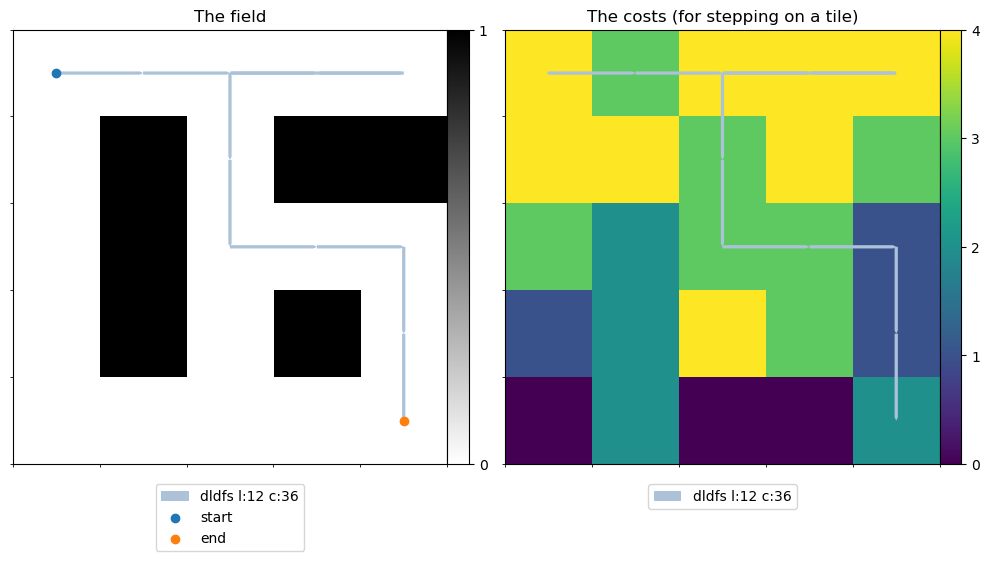

In [72]:
class DLDFS_Recursive(object):
    def __init__(self, max_depth):
        self.max_depth = max_depth

    def solve_aux(self, problem, current, depth = 0):
        if problem.is_end(current):
            return current

        if depth >= self.max_depth:
            return None
        
        for successor in problem.successors(current):
            result = self.solve_aux(problem, successor, depth + 1)
            if result is not None:
                return result

            
        return None

    def solve(self, problem: Problem):
        return self.solve_aux(problem, problem.get_start_node())


dldfs_search = DLDFS_Recursive(12)
maze.reset() # resets maze for hidden tests
dldfs_solution = dldfs_search.solve(maze)

if dldfs_solution is not None:
    dldfs_solution.pretty_print()
    maze.visualize(sequences=[('dldfs', dldfs_solution.get_action_sequence())])

### Basic Checks

In [73]:
# this is a testing cell, do not edit or delete

assert(dldfs_solution is not None), "your algorithm did not return a solution"
assert(dldfs_solution is not None or isinstance(dldfs_solution, type(maze.get_start_node()))), "your solution is not of the right type"
assert(dldfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"

assert(dldfs_solution.cost == 36), "the solution found by your algorithm did not return the expected cost"
assert(dldfs_solution.depth == 12), "the solution found by your algorithm does not have the expected length"

### Check different mazes

In [74]:
# we need more depth for some of the problem instances
max_dldfs_depth = 25

In [75]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
tiny0 = factory.create_problem_from_json(json_path='boards/tiny0.json')
dldfs_solution = dldfs_search.solve(tiny0)
assert(dldfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == '5eb9f93f575001cbddca893c699d418e47eff2b53f0c9a1a2072c3b9ad643dc7'), "your algorithm did not return the expected solution path"

In [76]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
dldfs_solution = dldfs_search.solve(tiny1)
assert(dldfs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == '7f10f7179c1d448ed33e8b8d0bb5372266cea15bd9ec0ffbdd11118438754d99'), "your algorithm did not return the expected solution path"

In [77]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
dldfs_solution = dldfs_search.solve(tiny2)
assert(dldfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == 'ebb80a630c129a7234ed6c9bcde740930a01622f4adde8b304db362ec5a24725'), "your algorithm did not return the expected solution path"

In [78]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
dldfs_solution = dldfs_search.solve(tiny3)
assert(dldfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == '8ec892c800ce37ea54e9ba4dab28681de6956e481d2ae0e032b1e11c59e4a718'), "your algorithm did not return the expected solution path"

In [79]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
tiny4 = factory.create_problem_from_json(json_path='boards/tiny4.json')
dldfs_solution = dldfs_search.solve(tiny4)
assert(dldfs_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == 'e097ad8539f0d2f7abe3160c1a47c24e1b19bdb9b0c40e0dcd7e9ecb3307c7bb'), "your algorithm did not return the expected solution path"

In [80]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=2)
cyclic_map = factory.create_problem_from_json(json_path='boards/cyclic_map.json')
dldfs_solution = dldfs_search.solve(cyclic_map)
assert(dldfs_solution is None), "your algorithm should not find a solution at max_depth=2"

In [81]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
cyclic_map = factory.create_problem_from_json(json_path='boards/cyclic_map.json')
dldfs_solution = dldfs_search.solve(cyclic_map)
assert(dldfs_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == '7ea076a692e54d03a54b160dbceb28175b083f29615149dda6a21a8c6347b28a'), "your algorithm did not return the expected solution path"

In [82]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
narrow_path = factory.create_problem_from_json(json_path='boards/narrow_path.json')
dldfs_solution = dldfs_search.solve(narrow_path)
assert(dldfs_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == 'ffb856b0937bb3fb160f44c61f57d391e0edfa9c6671bbfa773fcdba7c317b13'), "your algorithm did not return the expected solution path"

In [83]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
no_possible_path = factory.create_problem_from_json(json_path='boards/no_possible_path.json')
dldfs_solution = dldfs_search.solve(no_possible_path)
assert(dldfs_solution is None), "your algorithm magically found a solution in an impossible maze"

In [84]:
# this is a testing cell, do not edit or delete

dldfs_search = DLDFS_Recursive(max_depth=max_dldfs_depth)
start_is_goal = factory.create_problem_from_json(json_path='boards/start_is_goal.json')
dldfs_solution = dldfs_search.solve(start_is_goal)
assert(dldfs_solution.state == (0, 0)), "your algorithm did not return the expected solution"
assert(dldfs_solution.get_action_sequence_hash() == 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'), "your algorithm did not return the expected solution path"

## Implementing IDS

<strong>Hint:</strong>
<ul>
<li>Make use of the DLDFS algorithm that you implemented above</li>
</ul>

state (4, 4) was reached following the sequence ['R', 'R', 'D', 'D', 'R', 'R', 'D', 'D'] (cost: 20, depth: 8)


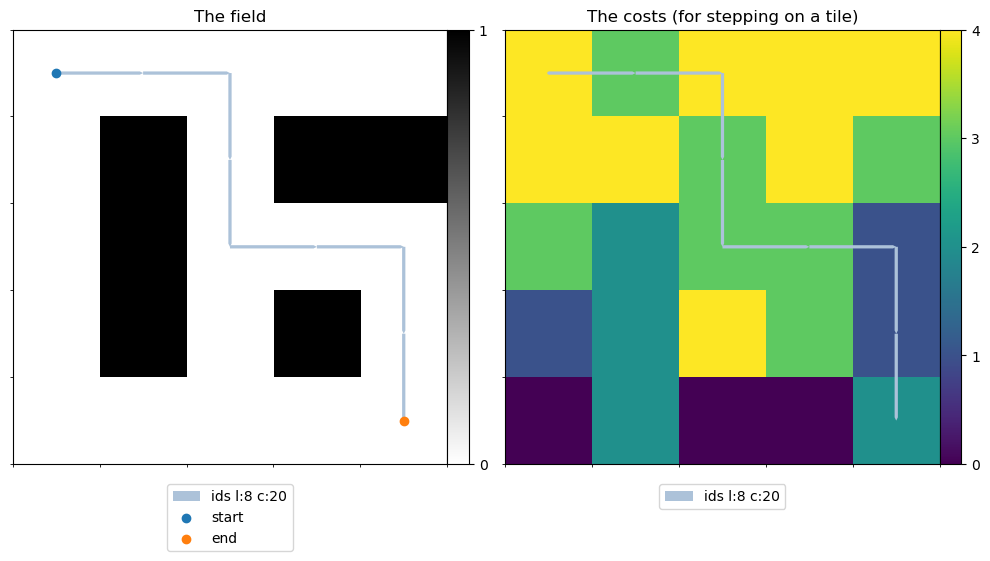

In [86]:
class IDS(object):
    def solve(self, problem: Problem):
        node = None
        depth = 0

        # YOUR CODE HERE
        while node is None:
            dldfs_search = DLDFS_Recursive(depth)
            node = dldfs_search.solve(problem)
            depth += 1

        return node
    
ids_search = IDS()
maze.reset() # resets maze for hidden tests
ids_solution = ids_search.solve(maze)

if ids_solution is not None:
    ids_solution.pretty_print()
    maze.visualize(sequences=[('ids', ids_solution.get_action_sequence())])

In [87]:
# this is a testing cell, do not edit or delete

assert(ids_solution is not None), "your algorithm did not return a solution"
assert(ids_solution is not None or isinstance(ids_solution, type(maze.get_start_node()))), "your solution is not of the right type"
assert(ids_solution.state == (4, 4)), "your algorithm did not return the expected solution"

assert(ids_solution.cost == 20), "the solution found by your algorithm did not return the expected cost"
assert(ids_solution.depth == 8), "the solution found by your algorithm does not have the expected length"

ids_expanded_nodes = maze.get_number_of_expanded_nodes()
bfs_search = BFS()
maze.reset() # resets maze for hidden tests
bfs_solution = bfs_search.solve(maze)
bfs_expanded_nodes = maze.get_number_of_expanded_nodes()
assert(ids_expanded_nodes > bfs_expanded_nodes), "the solution found by your algorithm is expected to have more expanded nodes than your solution for BFS."

Queue [Node(id:139993249005168, parent:139994341380400, state:(0, 0), action:None, cost:0, depth:0)]


### Check different mazes

In [88]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
tiny0 = factory.create_problem_from_json(json_path='boards/tiny0.json')
ids_solution = ids_search.solve(tiny0)
assert(ids_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == 'c283a9803562a0053fc1ea0c30d421e0b4a7a9f599c699d74477cbeeffec23bc'), "your algorithm did not return the expected solution path"

In [89]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
tiny1 = factory.create_problem_from_json(json_path='boards/tiny1.json')
ids_solution = ids_search.solve(tiny1)
assert(ids_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == '66ec8af4739b256cec553c3d2c2cbacbc1fd4c853859c633e44996eed1f6021c'), "your algorithm did not return the expected solution path"

In [90]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
tiny2 = factory.create_problem_from_json(json_path='boards/tiny2.json')
ids_solution = ids_search.solve(tiny2)
assert(ids_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == '5bda40f5b72290920507aa1d23329fb5a3445346372a30bd35cc85f743c439ac'), "your algorithm did not return the expected solution path"

In [91]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
tiny3 = factory.create_problem_from_json(json_path='boards/tiny3.json')
ids_solution = ids_search.solve(tiny3)
assert(ids_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == 'e1c95ac72da74163d0c237b69f99dc766c1bbe5e4270fd2934b721d5eab9de31'), "your algorithm did not return the expected solution path"

In [92]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
tiny4 = factory.create_problem_from_json(json_path='boards/tiny4.json')
ids_solution = ids_search.solve(tiny4)
assert(ids_solution.state == (4, 4)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == '0123d362bf2df8f84e7c41197827be005159724c07774ef32d9f15373a440091'), "your algorithm did not return the expected solution path"

In [93]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
cyclic_map = factory.create_problem_from_json(json_path='boards/cyclic_map.json')
ids_solution = ids_search.solve(cyclic_map)
assert(ids_solution.state == (2, 2)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == 'e1c95ac72da74163d0c237b69f99dc766c1bbe5e4270fd2934b721d5eab9de31'), "your algorithm did not return the expected solution path"

In [94]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
narrow_path = factory.create_problem_from_json(json_path='boards/narrow_path.json')
ids_solution = ids_search.solve(narrow_path)
assert(ids_solution.state == (2, 4)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == '2ee4599132a71cf20e4feae6aff58b9ff77ea9486fb0e12225ddd8896ccb9843'), "your algorithm did not return the expected solution path"

In [95]:
# this is a testing cell, do not edit or delete

ids_search = IDS()
start_is_goal = factory.create_problem_from_json(json_path='boards/start_is_goal.json')
ids_solution = ids_search.solve(start_is_goal)
assert(ids_solution.state == (0, 0)), "your algorithm did not return the expected solution"
assert(ids_solution.get_action_sequence_hash() == 'e3b0c44298fc1c149afbf4c8996fb92427ae41e4649b934ca495991b7852b855'), "your algorithm did not return the expected solution path"